<a href="https://colab.research.google.com/github/AbdelrahmanElkhradely/Data-classification---ML/blob/main/AUDIO_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import sys
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
!unzip /content/Crema_temp.zip -d /content

In [105]:
def load_dataset():
    Crema = "./Crema_temp/"
    fileNames = os.listdir(Crema)
    filePath = []
    fileEmotion = []

    for file in fileNames:
        filePath.append(Crema + file)
        part = file.split('_')

        if part[2] == 'SAD':
            fileEmotion.append('sad')
        elif part[2] == 'ANG':
            fileEmotion.append('angry')
        elif part[2] == 'NEU':
            fileEmotion.append('neutral')
        elif part[2] == 'HAP':
            fileEmotion.append('happy')
        elif part[2] == 'DIS':
            fileEmotion.append('disgust')
        elif part[2] == 'FEA':
            fileEmotion.append('fear')

    paths_df = pd.DataFrame(filePath, columns=['Path'])
    emotions_df = pd.DataFrame(fileEmotion, columns=['Emotion'])
    # data frame containing the emotion and path for each file
    crema_df = pd.concat([emotions_df, paths_df], axis=1)
    return crema_df

In [106]:
def loadAudio(data, sampleRate, emotion, path):

  #plotting waveform of the audio
  plt.figure(figsize=(10,3))
  plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
  librosa.display.waveplot(data, sr=sampleRate)
  plt.show()


In [ ]:
def shortTermEnergy(data):
  return sum( [ abs(x)**2 for x in data ] ) / len(data)


In [ ]:
def create_feature_space(crema_df):
    zcrFeature = []
    melFeature = []
    emotions = []
    energy=[]
    MFCC=[]
    CHROMA=[]
    CONTRAST=[]
    TONE=[]
    for path, emotion in zip(crema_df.Path, crema_df.Emotion):
        data, samplingRate = librosa.load(path)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=data, sr=samplingRate).T, axis=0)
        eng=shortTermEnergy(data)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=samplingRate, n_mfcc=40).T, axis=0)
        # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
        stft = np.abs(librosa.stft(data))
        # # Computes a chromagram from a waveform or power spectrogram.
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=samplingRate).T, axis=0)
        # Computes spectral contrast
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=samplingRate).T, axis=0)
        # Computes the tonal centroid features (tonnetz)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data),sr=samplingRate).T, axis=0)
        zcrFeature.append(zcr)
        melFeature.append(mel)
        emotions.append(emotion)
        energy.append(eng)
        MFCC.append(mfccs)
        CHROMA.append(chroma)
        CONTRAST.append(contrast)
        TONE.append(tonnetz)
    return zcrFeature,melFeature,emotions,energy,MFCC,CHROMA,CONTRAST,TONE


In [107]:
crema_df= load_dataset()

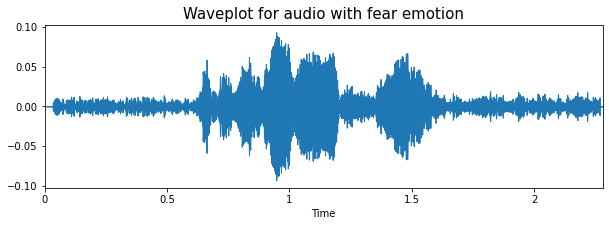

In [101]:
emotion='fear'
path=np.array(crema_df.Path[crema_df.Emotion==emotion])[1]
data, samplingRate = librosa.load(path)
loadAudio(data,samplingRate,emotion,path)
#listening to the audio
Audio(path)

In [108]:
    zcrFeature,melFeature,emotions,energy,MFCC,CHROMA,CONTRAST,TONE=create_feature_space(crema_df)
    data = {'ZCR': zcrFeature, 'MEL': melFeature,'ENG':energy,'EMOTION':emotions,'MFCC':MFCC,'CHROMA':CHROMA,
            'CONTRAST':CONTRAST,'TONE':TONE}
    # Create DataFrame
    df = pd.DataFrame(data)
    train, test = train_test_split(df, test_size=0.3)
    train, valdiation = train_test_split(train, test_size=0.05)

    train_x=train[['ZCR','MEL','ENG','MFCC','CHROMA','CONTRAST','TONE']]
    train_y=train[['EMOTION']]

    test_x=test[['ZCR','MEL','ENG','MFCC','CHROMA','CONTRAST','TONE']]
    test_y=test[['EMOTION']]

    validation_x=valdiation[['ZCR','MEL','ENG','MFCC','CHROMA','CONTRAST','TONE']]
    validation_y=valdiation[['EMOTION']]

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=552
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=782
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=787
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=932
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=679
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=851
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

In [134]:
def preparedata(train_x,train_y,validation_x,validation_y,test_x,test_y):
    # print('Training data shape : ', train_x.shape, train_y.shape)
    # print('Validation data shape : ', validation_x.shape, validation_y.shape)
    # print('Testing data shape : ', test_x.shape, test_y.shape)
    classes = np.unique(train_y)
    nClasses = len(classes)
    # print('Total number of outputs : ', nClasses)
    # print('Output classes : ', classes)

    labelencoder=LabelEncoder()

    train_y = to_categorical(labelencoder.fit_transform(train_y))
    test_y = to_categorical(labelencoder.fit_transform(test_y))
    validation_y = to_categorical(labelencoder.fit_transform(validation_y))
    # print(train_y)
    return train_x,train_y,validation_x,validation_y,test_x,test_y




# New Section

In [ ]:
train_x,train_y,validation_x,validation_y,test_x,test_y=preparedata(train_x,train_y,validation_x,validation_y,test_x,test_y)